In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv("budget.csv")

In [6]:
df.head()

,Year,Global GDP Index,Cust Serv Calls ('000s),Employees ('000),Items ('000),Revenue ($M)
0,1,100,25,45,11,2000.0
1,2,112,27,53,11,2400.0
2,3,115,22,54,12,2700.0
3,4,123,27,58,14,2900.0
4,5,122,32,60,14,3200.0


In [7]:
df.tail()

,Year,Global GDP Index,Cust Serv Calls ('000s),Employees ('000),Items ('000),Revenue ($M)
7,8,126,30,65,16,4200.0
8,9,166,34,85,17,4500.0
9,10,157,47,97,18,4700.0
10,11,176,33,98,18,4900.0
11,12,180,45,100,20,5000.0


In [9]:
# Calculate the correlation coefficients between Revenue and other variables
correlation = df.corr()["Revenue ($M)"].drop("Revenue ($M)")
strongly_related_variables = correlation[abs(correlation) >= 0.5].index.tolist()
print("Variables strongly related to Revenue ($M):", strongly_related_variables)

Variables strongly related to Revenue ($M): ['Year', 'Global GDP Index', "Cust Serv Calls ('000s)", "Employees ('000)", "Items ('000)"]


In [11]:
# Prepare the data
x = df[["Global GDP Index"]]
y = df["Revenue ($M)"]

In [12]:
# Create and fit the model
model = LinearRegression()
model.fit(x, y)

LinearRegression()

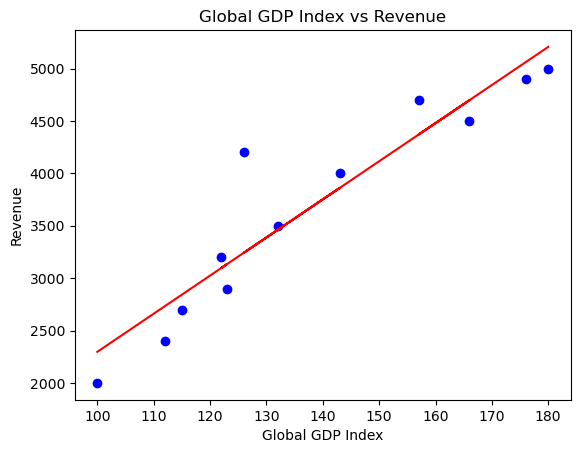

In [14]:
# Plotting
plt.scatter(x, y, color='blue')
plt.plot(x, model.predict(x), color='red')
plt.title('Global GDP Index vs Revenue')
plt.xlabel('Global GDP Index')
plt.ylabel('Revenue')
plt.show()

In [15]:
# Model coefficients
intercept = model.intercept_
coefficient = model.coef_[0]
print("Intercept:", intercept)
print("Coefficient:", coefficient)
print("Model relationship: y = {:.2f}x + {:.2f}".format(coefficient, intercept))

Intercept: -1340.3165654813533
Coefficient: 36.370338248048576
Model relationship: y = 36.37x + -1340.32


In [23]:
#Q2: Multiple Linear Regression
X_multi = df[['Global GDP Index', "Cust Serv Calls ('000s)", "Employees ('000)", "Items ('000)"]]
y_multi = df['Revenue ($M)']

In [24]:
# Fit the multiple linear regression model
model_multi = LinearRegression()
model_multi.fit(X_multi, y_multi)

LinearRegression()

In [25]:
# Get the intercept and coefficients
intercept_multi = model_multi.intercept_
coefficients_multi = model_multi.coef_

In [27]:
print("Intercept (Multiple Linear Regression):", intercept_multi)


Intercept (Multiple Linear Regression): -1055.9754073179643


In [28]:
print("Coefficients (Multiple Linear Regression):", coefficients_multi)


Coefficients (Multiple Linear Regression): [ -6.11731329 -19.18543741  21.12947334 309.63430185]


In [29]:
print("Model relationship: Y = {} + {}X_1 + {}X_2 + {}X_3 + {}X_4".format(intercept_multi, coefficients_multi[0], coefficients_multi[1], coefficients_multi[2], coefficients_multi[3]))

Model relationship: Y = -1055.9754073179643 + -6.117313292362904X_1 + -19.185437414631366X_2 + 21.1294733429001X_3 + 309.6343018539977X_4
